In [1]:
import torch
from torch import Generator
from torch.utils import data

from datasets.segmentation import CrackSeg


TRAIN_PERCENTAGE = 0.9
dataset = CrackSeg("data/crack-segmentation/dataset/image", "data/crack-segmentation/dataset/mask")
testset = CrackSeg("data/crack-segmentation/dataset/val_img", "data/crack-segmentation/dataset/val_msk")
trainset, validationset = data.random_split(dataset, [TRAIN_PERCENTAGE, 1-TRAIN_PERCENTAGE],
                                            generator=Generator().manual_seed(104179))
device = torch.device("cuda")

/home/diego/miniconda3/envs/py312_torch/lib/python3.12/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


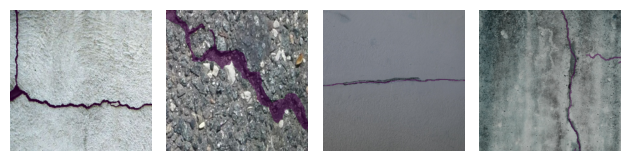

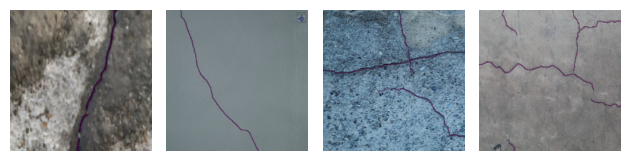

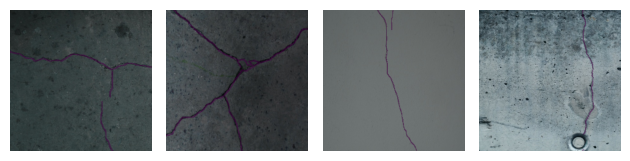

In [4]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.adam import Adam
from torch.utils.data import DataLoader


from models.tiny_crack_net import TinyCrackNet
from train_utils import segmentation


BATCH_SIZE = 32
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, drop_last=True)
validation_loader = DataLoader(validationset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
segmentation.show_batch(train_loader, 31)
segmentation.show_batch(train_loader, 32)
segmentation.show_batch(train_loader, 33)


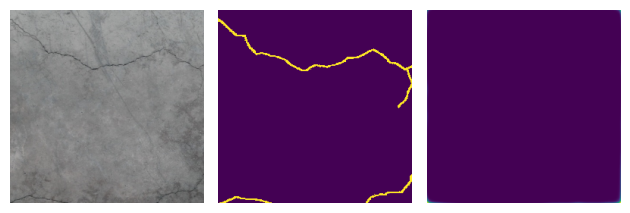

In [4]:
from torch.nn import Sequential, Sigmoid
from models.tiny_crack_net import TinyCrackNet, TCNLightning


tcn = TinyCrackNet(1)
tcn.classifier = Sequential(
    tcn.classifier,
    Sigmoid()
)
segmenter = TCNLightning.load_from_checkpoint('lightning_logs/version_7/checkpoints/epoch=149-step=600.ckpt',
                                              tcn=tcn)
segmenter.eval()
segmentation.compare_prediction(segmenter, trainset, 1, device)